<a href="https://colab.research.google.com/github/hjk1996/blog_post/blob/main/KL_Divergence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

정규분포를 구하는 공식은 다음과 같습니다.

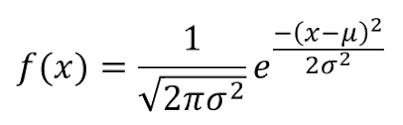

In [11]:
# 정규분포를 계산하는 함수를 정의합니다.
def normal_distribution(x, mu=0, sigma=1):
  return (1 / (np.sqrt(2*np.pi)*sigma) ) * np.exp( -(x-mu)**2/(2*sigma**2))

KL Divergence를 계산하는 공식은 다음과 같습니다.

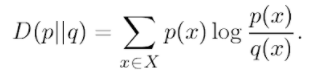

In [50]:
# KL Divergence를 계산하는 함수를 만듭니다.
def kl_divergence(p, q):
  return np.sum(p*np.log(p/q))

비교에 사용할 데이터를 생성하겠습니다.

In [47]:
# 평균이 2, 표준편차가 1인 정규분포를 만듭니다.
x1 = np.linspace(-20, 20, 1000)
y1 = normal_distribution(x1, 2, 1)

In [48]:
# 평균이 3, 표준편차가 2인 정규분포를 만듭니다.
x2 = np.linspace(-20, 20, 1000)
y2 = normal_distribution(x2, 3, 2)

In [55]:
# 평균이 1, 표준편차가 3인 정규분포를 만듭니다.
x3 = np.linspace(-20, 20, 1000)
y3 = normal_distribution(x3, 1, 3)

만든 정규 분포를 시각화 해보겠습니다.

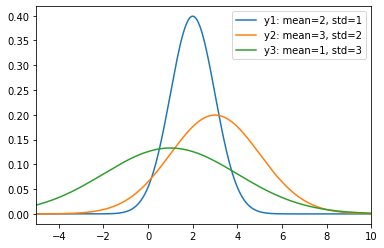

In [77]:
# 정규분포에 대한 그래프를 그립니다.
plt.plot(x1, y1, label="y1: mean=2, std=1")
plt.plot(x2, y2, label="y2: mean=3, std=2")
plt.plot(x3, y3, label="y3: mean=1, std=3")
plt.xlim(-5, 10)
plt.legend()
plt.show()

KL Divergence 값에 대한 테이블을 그립니다.

In [73]:
import pandas as pd

In [85]:
ys = [y1, y2, y3]
klds = []
for p in ys:
  for q in ys:
    klds.append(kl_divergence(p, q))

klds = np.array(klds).reshape(3,3)
table = pd.DataFrame(klds, columns=["y1", "y2", "y3"], index=["y1", "y2", "y3"])
table

,y1,y2,y3
y1,0.000000,11.067601,17.725342
y2,32.638649,0.000000,8.738991
y3,84.949658,17.970384,0.000000


분포가 완전히 동일한 경우 0의 값을 가진다는 것과

$D(p|q)$와 $D(q|p)$가 동일하지 않다는 것을 확인할 수 있습니다.